In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../mapped.bed/mapped.bed', sep='\t', header=None)


In [ ]:
df['C1'] = (df[2] + df[3]) // 2
df['C2'] = (df[8] + df[9]) // 2

df['X'] = df['C2'] - df['C1']
df['Y'] = df[9] - df[8]

cntdf = df[['X', 'Y']].value_counts().reset_index(name='Z')
cntdf.head()

#---------------- I tried to do this way manual : make dictionary for counts of pair X,Y and then make df out of it-----------------------
#But it is slow and inbuild function is faster due to 
#  - Highly optimized C/Cython backend in pandas.
#  - Uses a hash table internally — fast lookups and insertions.
# cntdict = {}
# for i in range(len(df)):
#     x = df['X'][i]
#     y = df['Y'][i]
#     if (x, y) in cntdict:
#         cntdict[(x, y)] += 1
#     else:
#         cntdict[(x, y)] = 1


,X,Y,Z
0,5,55,190
1,9,51,188
2,-2,57,184
3,-3,56,178
4,2,63,177


In [11]:
# Reshaping the DataFrame in good flat format for heatmap - Rows are indexed with Y and columns with X and the values are Z.
kr = cntdf.pivot_table(index='Y', columns='X', values='Z', fill_value=0) 

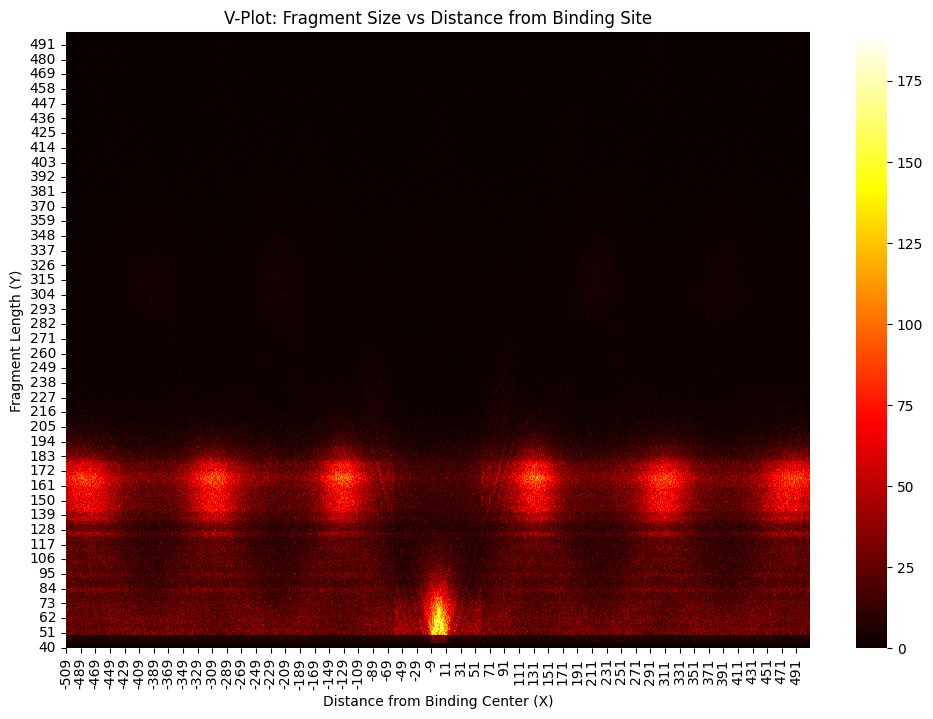

In [ ]:
#Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(kr, cmap='hot')
plt.title('V-Plot: Fragment Size vs Distance from Binding Site')
plt.xlabel('Distance from Binding Center (X)')
plt.ylabel('Fragment Length (Y)')
plt.gca().invert_yaxis()
plt.show()